In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
%%time
df = pd.read_csv("ds_ass.csv")      #Read csv file

CPU times: total: 844 ms
Wall time: 873 ms


In [3]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@kerinokeefe,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red
2,@paulgwine,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling
4,@paulgwine,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir


In [4]:
df.shape

(103322, 12)

In [5]:
df.isna().sum()

user_name             24131
country                  39
review_title              0
review_description        0
designation           29636
points                    0
price                  6963
province                 39
region_1              16068
region_2              58459
winery                    0
variety                   0
dtype: int64

In [6]:
pd.set_option('display.max_colwidth', 200)
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@kerinokeefe,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red
2,@paulgwine,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling
4,@paulgwine,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir


If we look closely into "review_title" column we can see that it is comnbination of "designation" column followed by "variety" column and "region" column enclosed in brackets. Eg:{

'review_title' : Andrew Peace 2007 Peace Family Vineyard Chardonnay

                  (South Eastern Australia)


'designation' : Peace Family Vineyard

'variety' : Chardonnay

'region_1' : South Eastern Australia

}

Therefore we shall be ignoring these columns in our EDA

In [7]:
df.drop(labels= ['user_name', 'designation', 'region_1', 'region_2'], axis=1, inplace=True)
df.dropna(inplace=True)
df = df.reset_index()
#Percentage of NaNs in our dataset
df.isna().mean()*100

index                 0.0
country               0.0
review_title          0.0
review_description    0.0
points                0.0
price                 0.0
province              0.0
winery                0.0
variety               0.0
dtype: float64

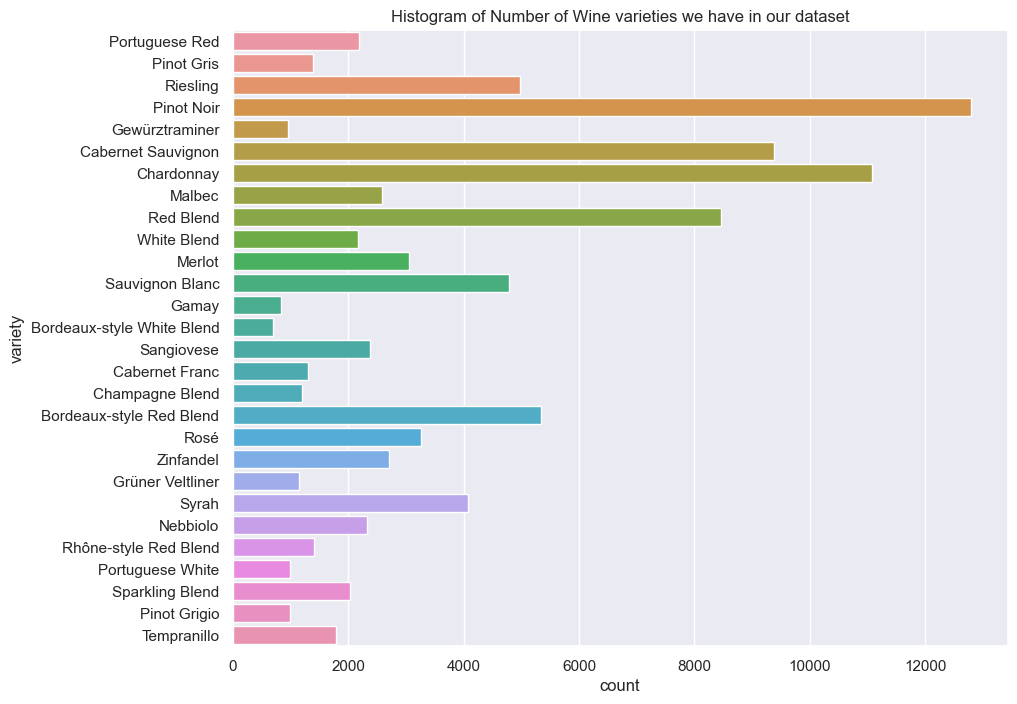

In [9]:
plt.figure(figsize = (10,8))
sns.countplot(y = df['variety'])
plt.title('Histogram of Number of Wine varieties we have in our dataset')
plt.show()

Cheap vs Expensive wine:

Can I taste the difference between cheap and expensive wine? Can anybody really tell the difference?


- Let me explain it to you in brief. It turns out that most of us (the common people) are really not good at distinguishing the taste between expensive and cheap wines except the few, the so called "Experts".

Two experiments were conducted to try to find the anwer for this question

1. A blind taste test where people were introduced to taste wines ranging from $10 and below to $150 and above

- The surprising results of this test were that in blind tastings of regular people, there is no correlation between the wines they like and the price of the wine. In fact, the paper found a slightly negative correlation, suggesting that regular people actually prefer cheaper wines.

- Among "wine experts" (people with formal wine training), the test found a slight positive correlation between the price of wine and the scores assigned by the reviewers and there were 12% of them in the sample set.

2. A taste test but this time the participants were informed of their respective prices. An experiment conducted by Johan Almenberg and Anna Dreber of the American Association of Wine Economists to answer the question "When Does the Price Affect the Taste?"

- This test's results were not much of a surprise as Almenberg and Dreber’s test found that people (especially Women) assign a considerably higher rating to wine when informed before tasting that the wine retails for $40 a bottle.

- The test found a positive correlation between the score given by the participants and the price of the wine.

- Equiped with this knowledge lets try to explore our data in this viewpoint and check whether there is a positive correlation between the wine's price and its ratings/scores given by the user.

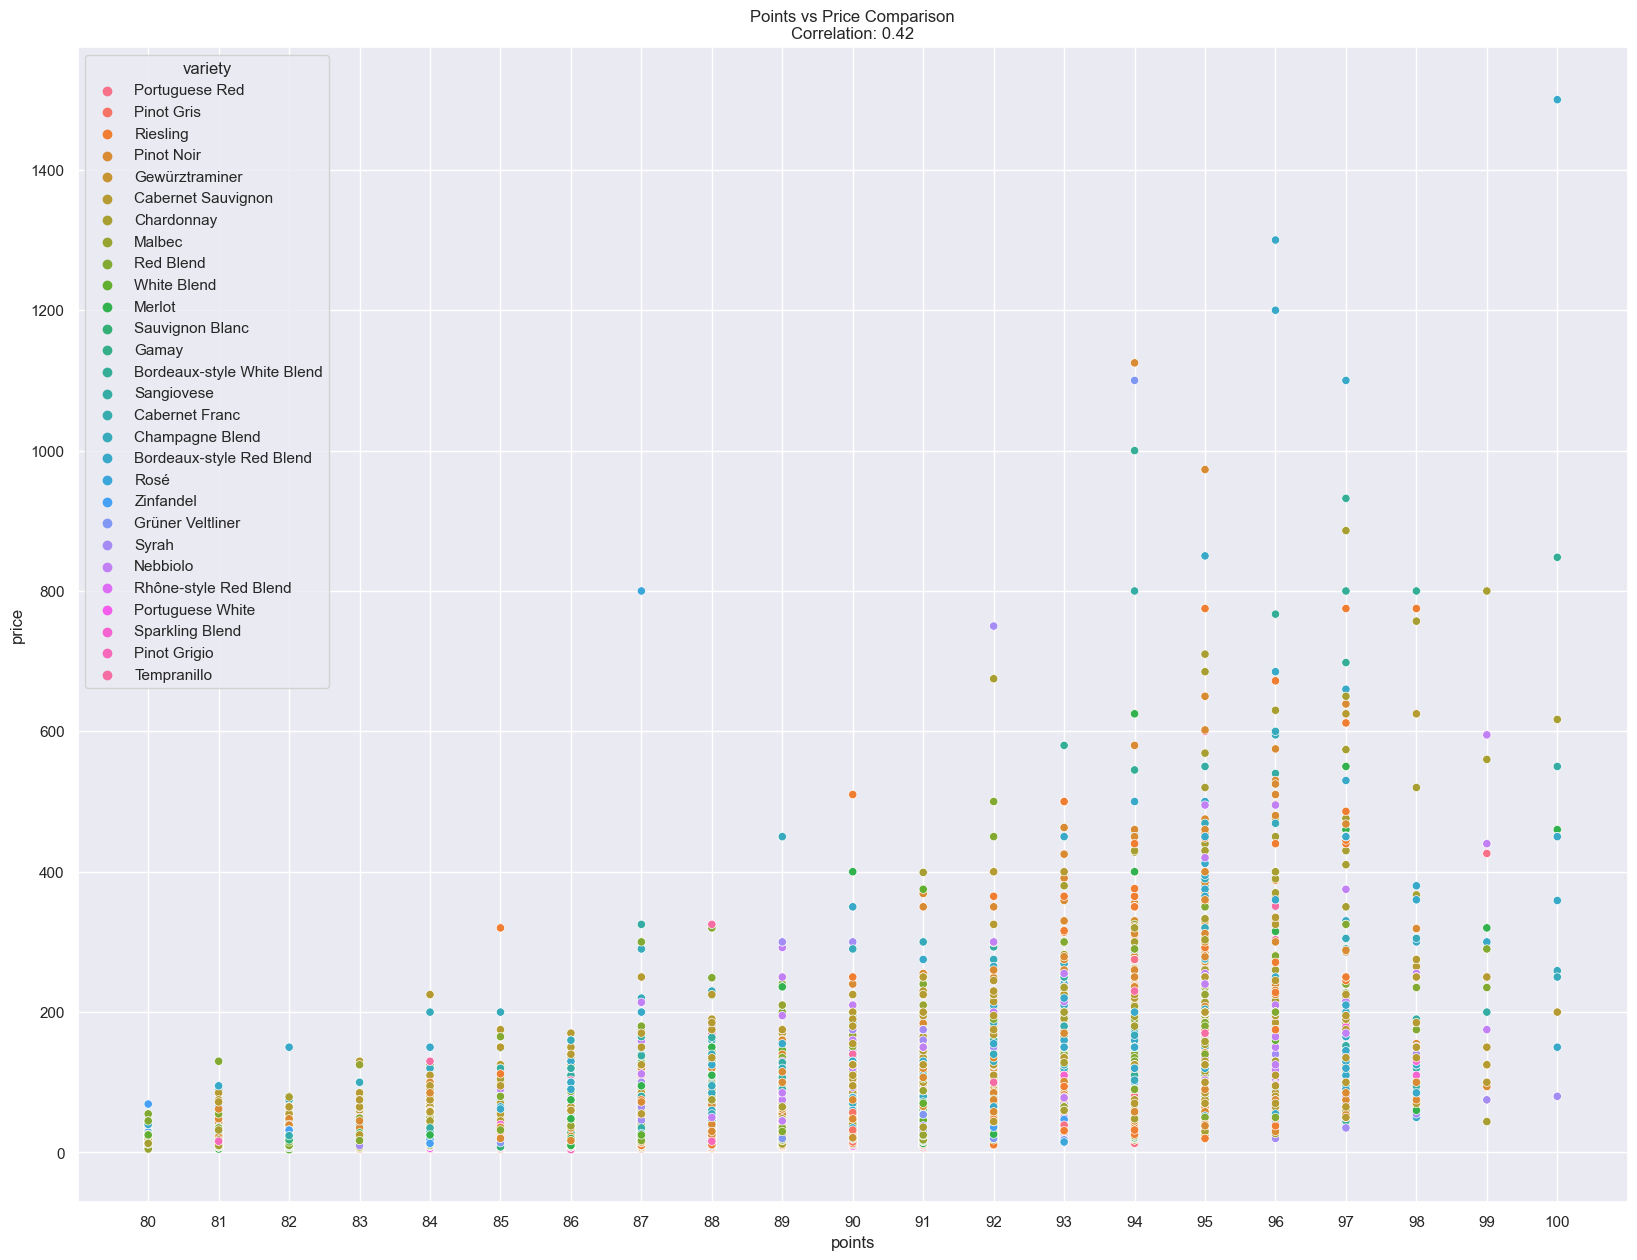

In [20]:
correlation = df['price'].corr(df['points'])

plt.figure(figsize=(20, 15))
sns.scatterplot(data=df[df.price <= 1500], x='points', y='price', hue='variety')
plt.xticks(np.unique(df.points))
plt.title('Points vs Price Comparison\nCorrelation: {:.2f}'.format(correlation))
plt.show()

In [23]:
from scipy.stats import spearmanr
corr, _ = spearmanr(df['points'],df['price'])
print('Spearman correlation: %.3f' % corr)

Spearman correlation: 0.614


## Spearman's Correlation:
- The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation. Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of association between two ranked variables. Or put in simple words it measures whether the variables are directly proportional or inversely proportional.

The Spearman's Correlation ranges from -1 to 1 indicating "Negative Correlation" and "Positive Correlation" respectively with 0 indicating "Neutral".

From the above plot we could see that price variation increases as points increases and this positive correlation is confirmed by our Spearman's Correlation test with a score 0.614 that is close to 1.

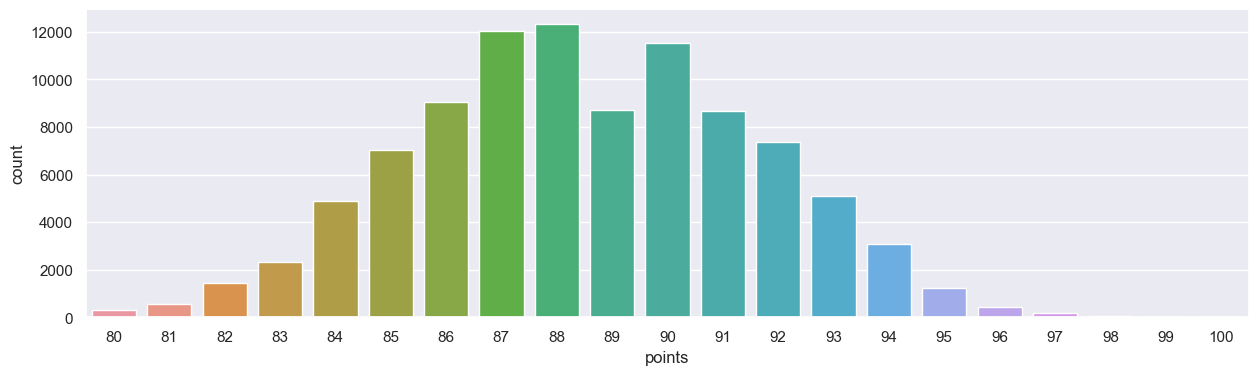

In [27]:
plt.figure(figsize = (15,4))
sns.set(font_scale = 1)
sns.countplot(x=df['points'])
plt.show()

We can see that the points given to wine bottles are having a "Normal Distribution" indicting that there are no discrimination in judging the wine among the test users and most of them has given a reasonable score of 87-90 not too less and not too much.

In [36]:
import geopandas as gpd

- link to the file
https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/

In [41]:
df1 = gpd.read_file('ne_110m_admin_0_countries_lakes.shp')  
pd.set_option('display.max_colwidth',30)
df1.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((180.00000 ...
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON ((34.07263 -1.0598...


In [42]:
df.head()

,index,country,review_title,review_description,points,price,province,winery,variety
0,1,Portugal,Quinta dos Avidagos 2011 A...,"This is ripe and fruity, a...",87,15.0,Douro,Quinta dos Avidagos,Portuguese Red
1,2,US,Rainstorm 2013 Pinot Gris ...,"Tart and snappy, the flavo...",87,14.0,Oregon,Rainstorm,Pinot Gris
2,3,US,St. Julian 2013 Reserve La...,"Pineapple rind, lemon pith...",87,13.0,Michigan,St. Julian,Riesling
3,4,US,Sweet Cheeks 2012 Vintner'...,Much like the regular bott...,87,65.0,Oregon,Sweet Cheeks,Pinot Noir
4,5,France,Trimbach 2012 Gewurztramin...,This dry and restrained wi...,87,24.0,Alsace,Trimbach,Gewürztraminer


In [43]:

df2 = df1.copy()
df2[df2['SOVEREIGNT'] == 'Italy']

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
141,Admin-0 country,1,2,Italy,ITA,0,2,Sovereign country,1,Italy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MULTIPOLYGON (((10.44270 4...


In [44]:
#wine contains country name as 'US' and our geographical polygons dataset contains country name as 'United States of America' so lets replace that.
df1['SOVEREIGNT'].replace({'United States of America': 'US'}, inplace = True)  

In [52]:
df1 = df1[['SOVEREIGNT', 'geometry']]#Selecting only country name and geometry columns
df1 = df1.rename(columns={'SOVEREIGNT': 'country'})
merged = pd.merge(df1, df, on='country', how='outer')


In [54]:
merged = merged[['country', 'geometry', 'price']]

In [55]:
merged.dropna(inplace=True)
merged = merged.reset_index()

C:\Users\91782\AppData\Local\Temp\ipykernel_10416\254893154.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged['price'])


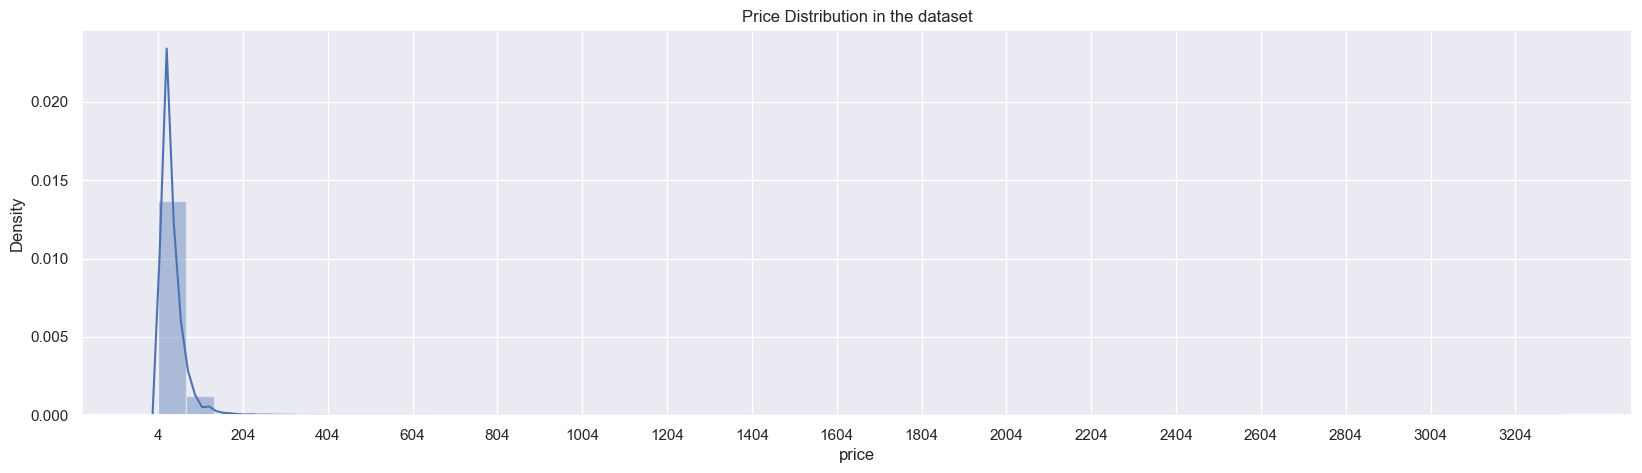

In [56]:
plt.figure(figsize = (20,5))
sns.distplot(merged['price'])
plt.xticks(np.arange(min(merged['price']), max(merged['price'])+1, 200))
plt.title('Price Distribution in the dataset')
plt.show()

Histogram clearly shows that most the wine cost below 204 which is very cheap compared to 3204 in out dataset. This is a clear indicator that our dataset suffers from huge outliers.

Now lets try to figure out which country sells the most expensive wine

d:\anaconda-ne\envs\wineshop\lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 40 classes. Setting k to 34.
  warnings.warn(


CPU times: total: 4min 7s
Wall time: 4min 35s


Text(0.5, 1.0, 'PRICES OF WINE IN DIFFERENT COUNTRIES')

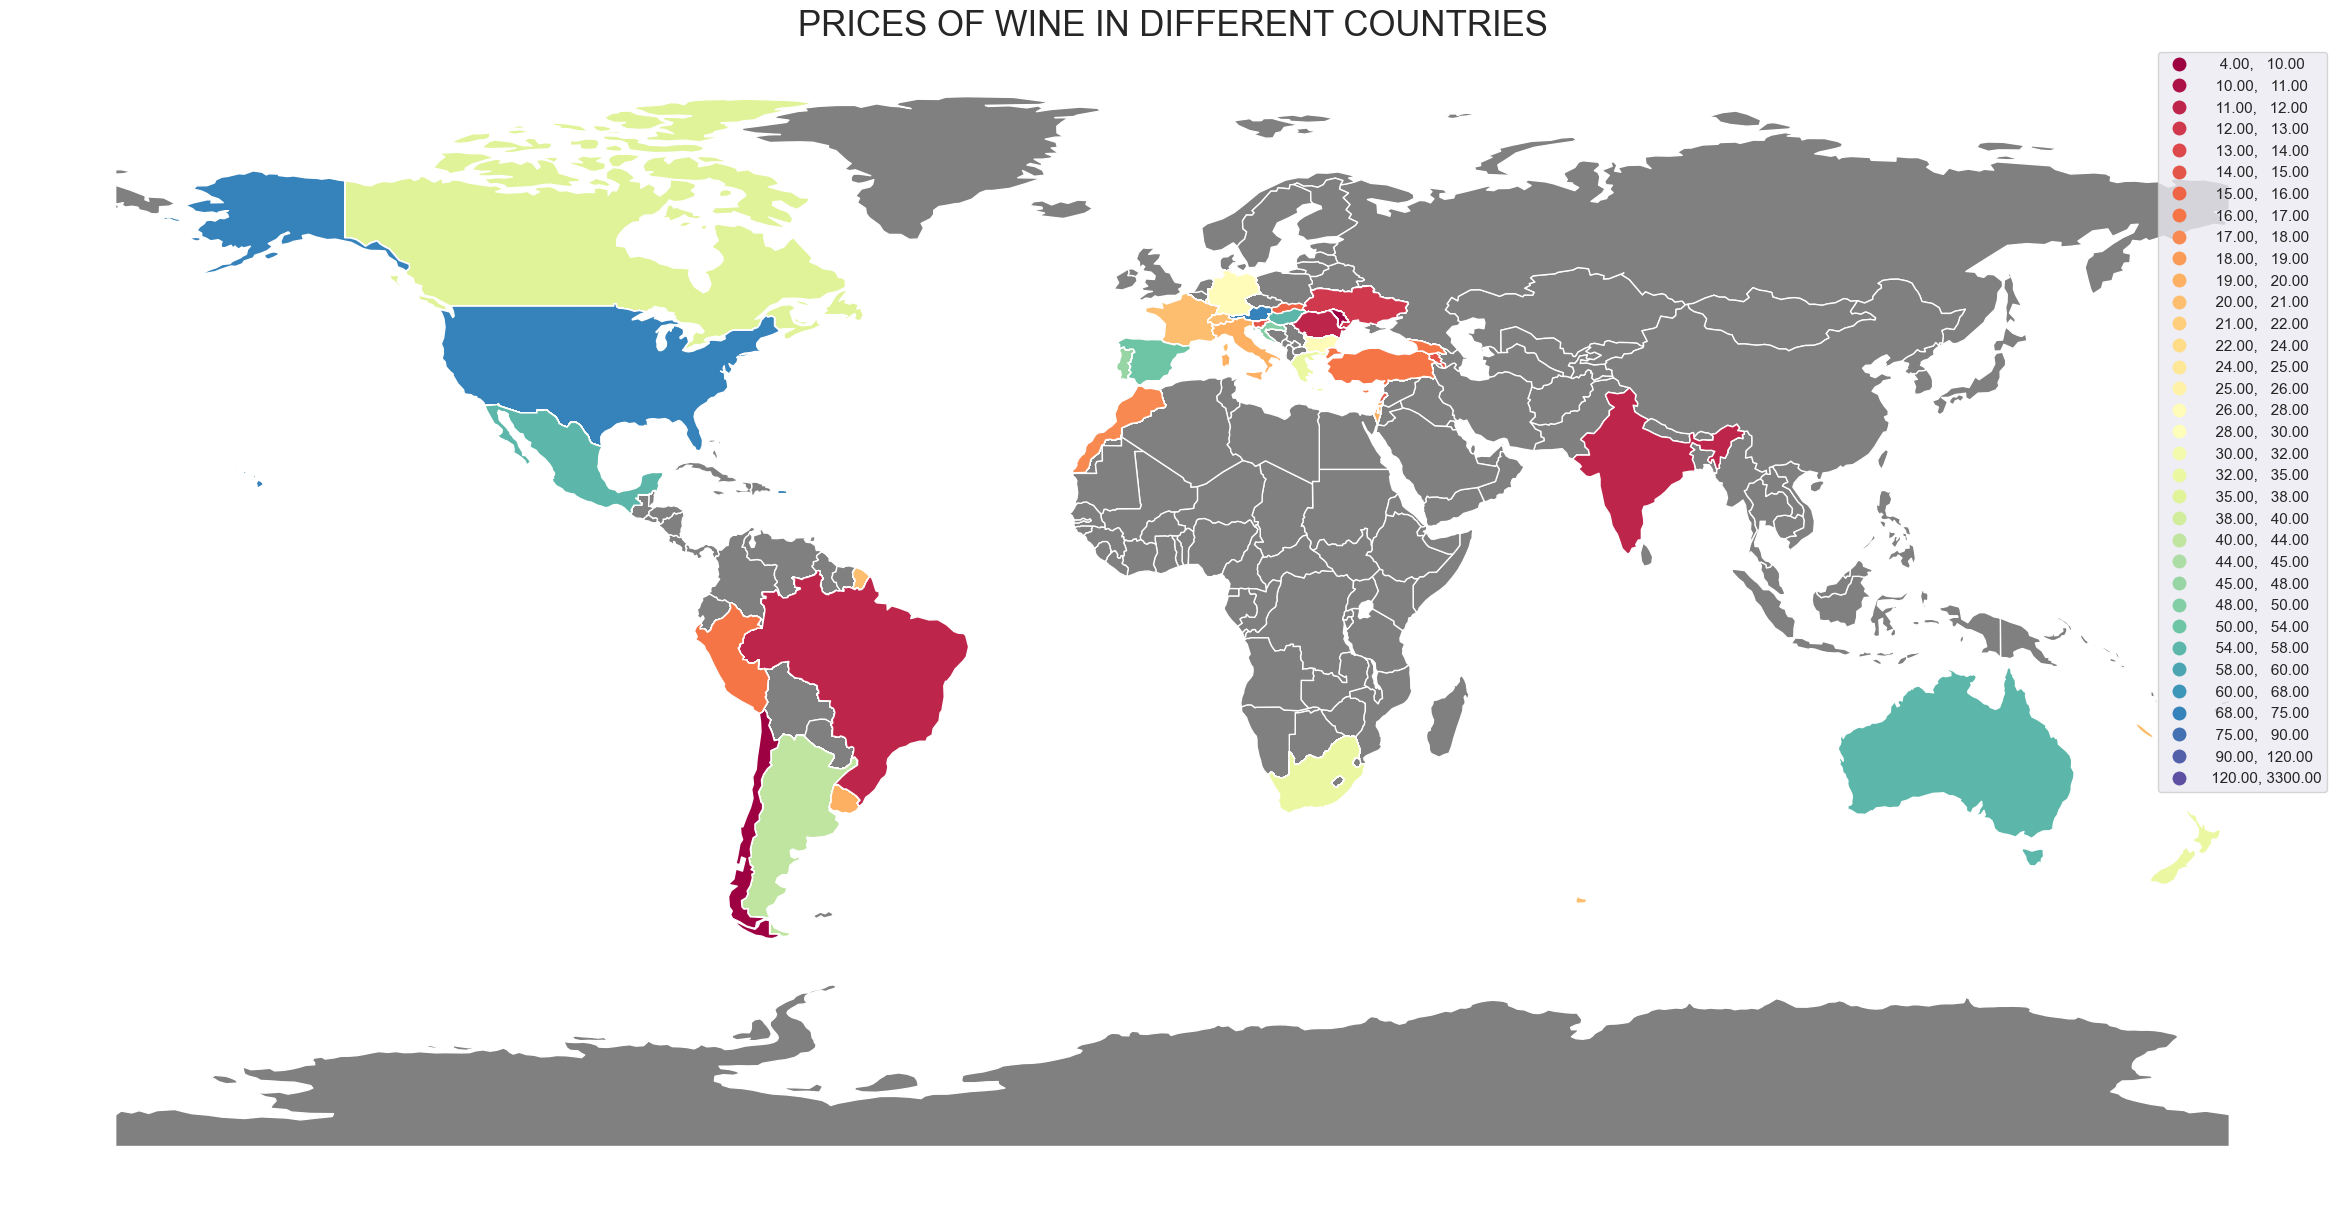

In [60]:
%%time
%matplotlib inline
ax = df1.plot(color = 'grey', figsize = (30,15))
merged.plot(ax = ax, column = 'price', cmap = 'Spectral', figsize=(30,15), scheme='quantiles',  
                  k=40, legend = True);
ax.set_axis_off()
ax.set_title('PRICES OF WINE IN DIFFERENT COUNTRIES', fontdict= {'fontsize':25})
     

1. Countries where Wine are cheap

- Peru
- India
- Romania
2. Countries where Wine are expensive

- Italy
- New Zealand
[Note: Grey portions in the map indicate that no data is available for that country in the dataset we use]

So far so good, we were able to locate which countries sell most expensive and cheap wine but now let's try to figure out which is the most expensive wine in our dataset.

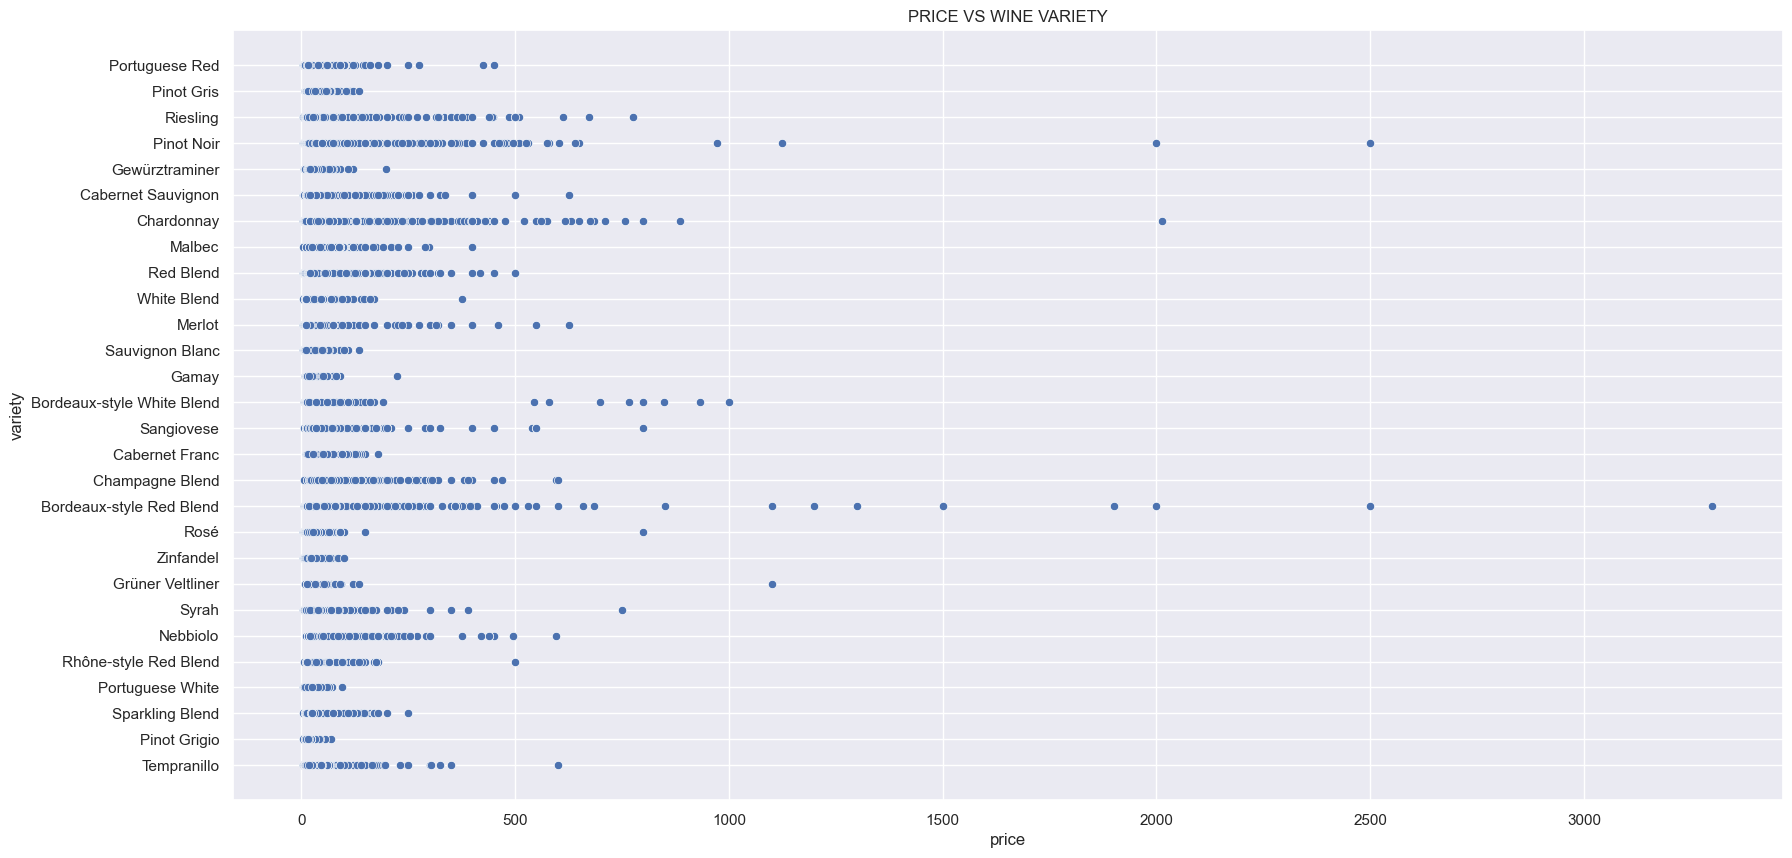

In [63]:
plt.figure(figsize = (20,10))
sns.scatterplot(x= df['price'], y= df['variety'])
plt.title('PRICE VS WINE VARIETY')
plt.show()

And the winner is Bordeaux-style Red Blend wine with the highest outliers compared to the ones in our dataset.(Most expensive one)

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,96324.0,51700.292087,29820.505884,1.0,25871.75,51762.5,77499.25,103321.0
points,96324.0,88.506987,3.094054,80.0,86.00,88.0,91.00,100.0
price,96324.0,36.785246,42.873911,4.0,18.00,27.0,45.00,3300.0


In [66]:
temp = []
for i in range(101): 
  temp.append([i,np.nanpercentile(df['price'],i)]) 
temp = pd.DataFrame(temp, columns = ['percentile','price'])
temp.head()

,percentile,price
0,0,4.0
1,1,8.0
2,2,9.0
3,3,10.0
4,4,10.0


In [67]:
temp = temp.merge(df, on = 'price', how = 'outer')

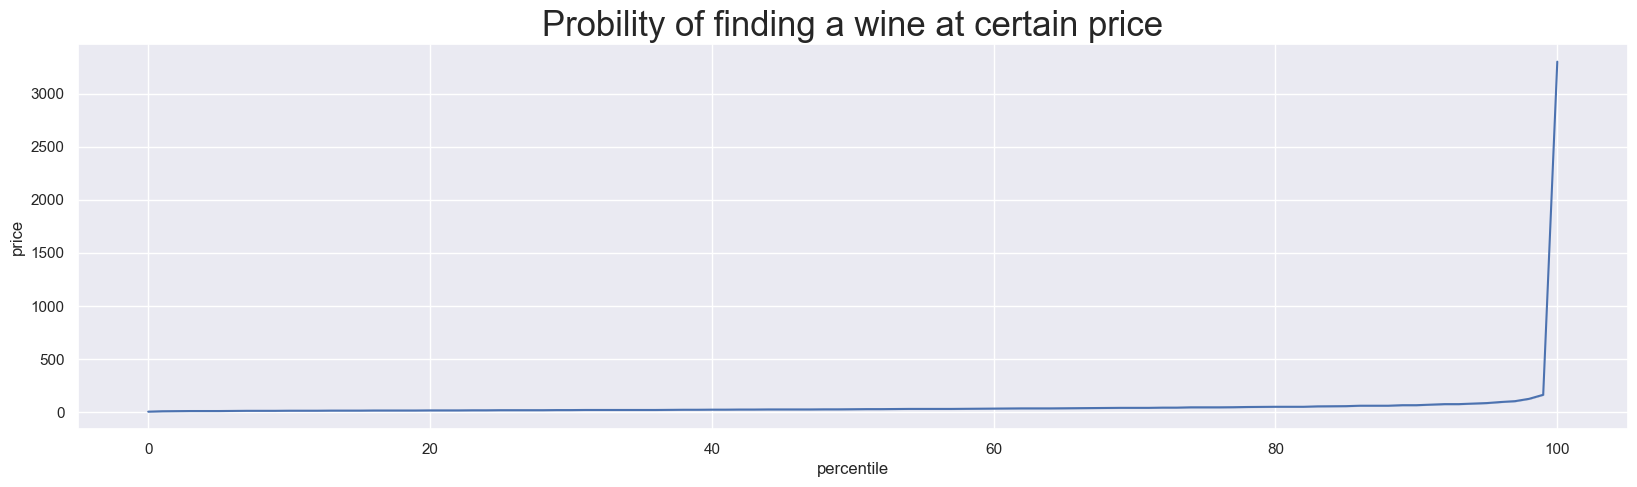

In [69]:
plt.figure(figsize = (20,5))
sns.lineplot(x = temp['percentile'], y = temp['price'])
plt.title('Probility of finding a wine at certain price', fontdict={'fontsize':25})
plt.show()

In [70]:
print('99th percentile : ', np.nanpercentile(df['price'],99))
print('Max price :', max(df['price']))

99th percentile :  163.0
Max price : 3300.0


This shows that there is 99% probability that one can find a wine bottle for a price on or below 165 and the rest of the data suggests a strong outlier that extends upto 3300 (Really unlucky ones to find a wine at that price). This findings can be attributed to the fact that each country has its own pricing for the same wine (geographical location dependent).

# Now lets analyse some customer reviews

In [72]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

In [73]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df['review_description']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

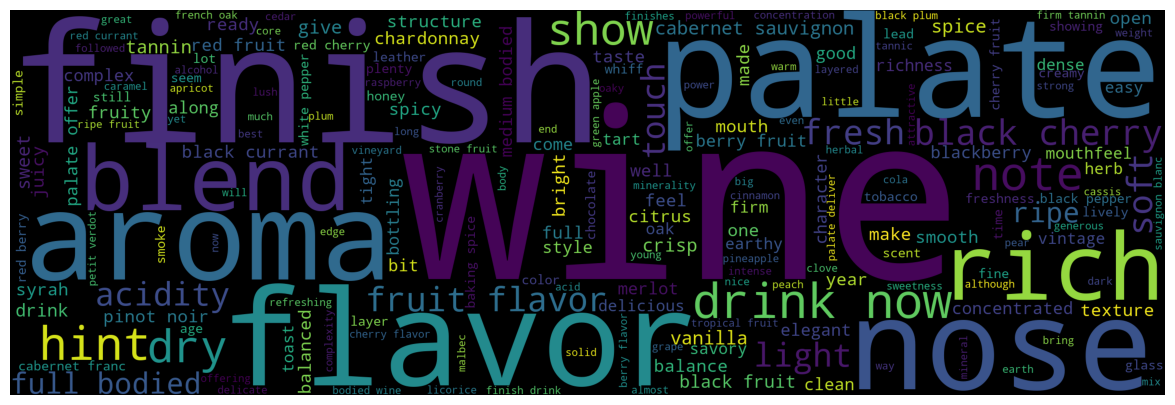

In [74]:
wordcloud = WordCloud(width = 2400, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (30,5)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

Our first look into the wordcloud shows that most of the reviews concentrate on flavours and texture of the drink showing an overall positive view on all the wine varities reviewed.

END NOTES : From our analysis I would like to conclude that the price of a wine variety is strongly dependent on

1. Points
2. Location and
3. User_reviews